# Bank Marketing

### Import required libraries

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Q1. Read the data and do exploratory data analysis. Describe the data briefly.

In [66]:
df_emp = pd.read_csv('bank_marketing_part1_Data.csv') 

In [67]:
df_emp.head() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [68]:
df_emp.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [69]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Missing Data Treatment

In [70]:
df_emp.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### No missing value in any field

In [71]:
df_emp.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


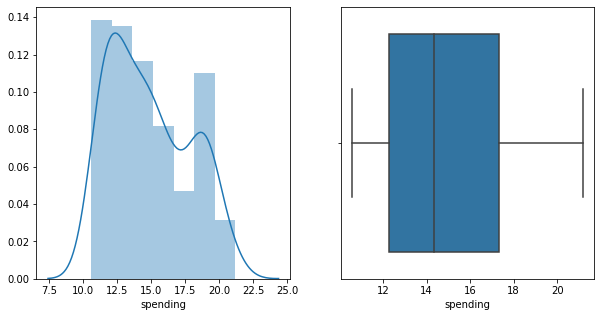

In [72]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.spending, kde=True, ax=axs[0]) 
sns.boxplot(x= 'spending', data=df_emp, ax=axs[1]) 

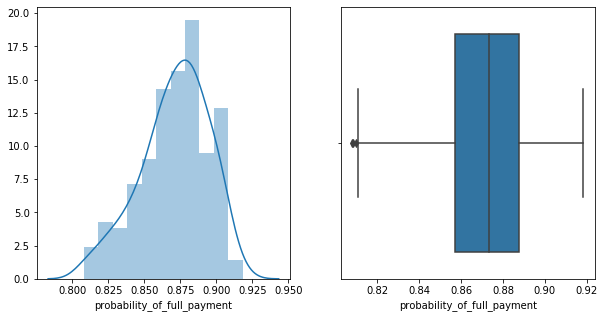

In [73]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.probability_of_full_payment, kde=True, ax=axs[0]) 
sns.boxplot(x= 'probability_of_full_payment', data=df_emp, ax=axs[1])

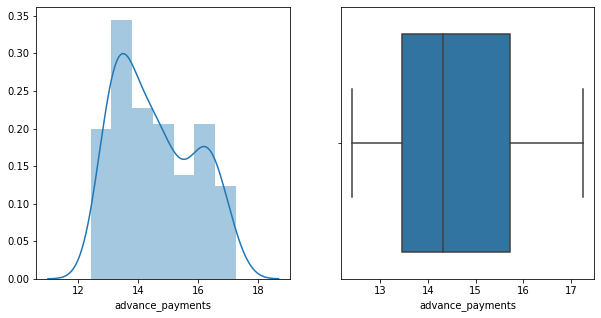

In [74]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.advance_payments, kde=True, ax=axs[0]) 
sns.boxplot(x= 'advance_payments', data=df_emp, ax=axs[1]) 

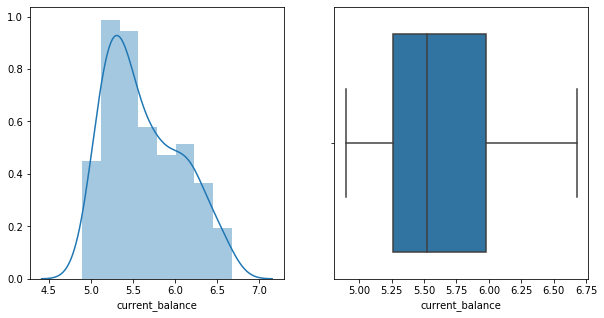

In [75]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.current_balance, kde=True, ax=axs[0]) 
sns.boxplot(x= 'current_balance', data=df_emp, ax=axs[1]) 

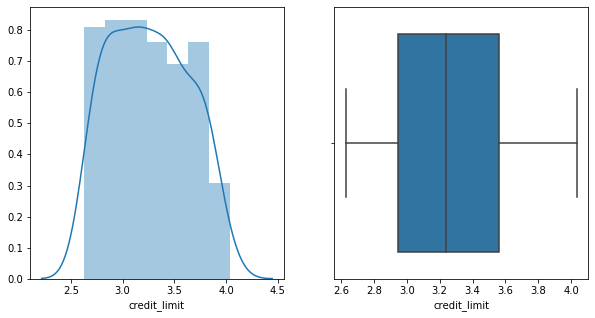

In [76]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.credit_limit, kde=True, ax=axs[0]) 
sns.boxplot(x= 'credit_limit', data=df_emp, ax=axs[1]) 

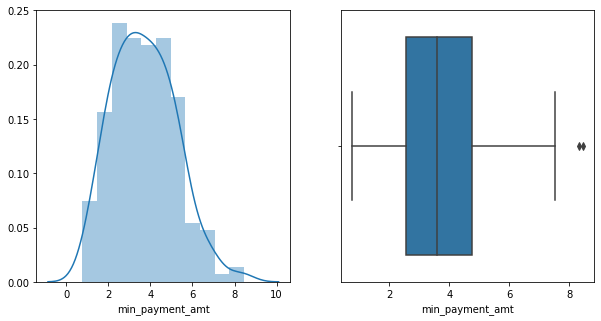

In [77]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.min_payment_amt, kde=True, ax=axs[0]) 
sns.boxplot(x= 'min_payment_amt', data=df_emp, ax=axs[1]) 

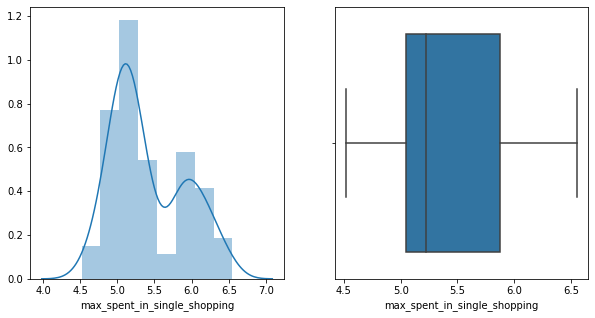

In [78]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.distplot(df_emp.max_spent_in_single_shopping, kde=True, ax=axs[0]) 
sns.boxplot(x= 'max_spent_in_single_shopping', data=df_emp, ax=axs[1]) 

In [79]:
df_emp_numeric = df_emp.select_dtypes(include = ['float64'])

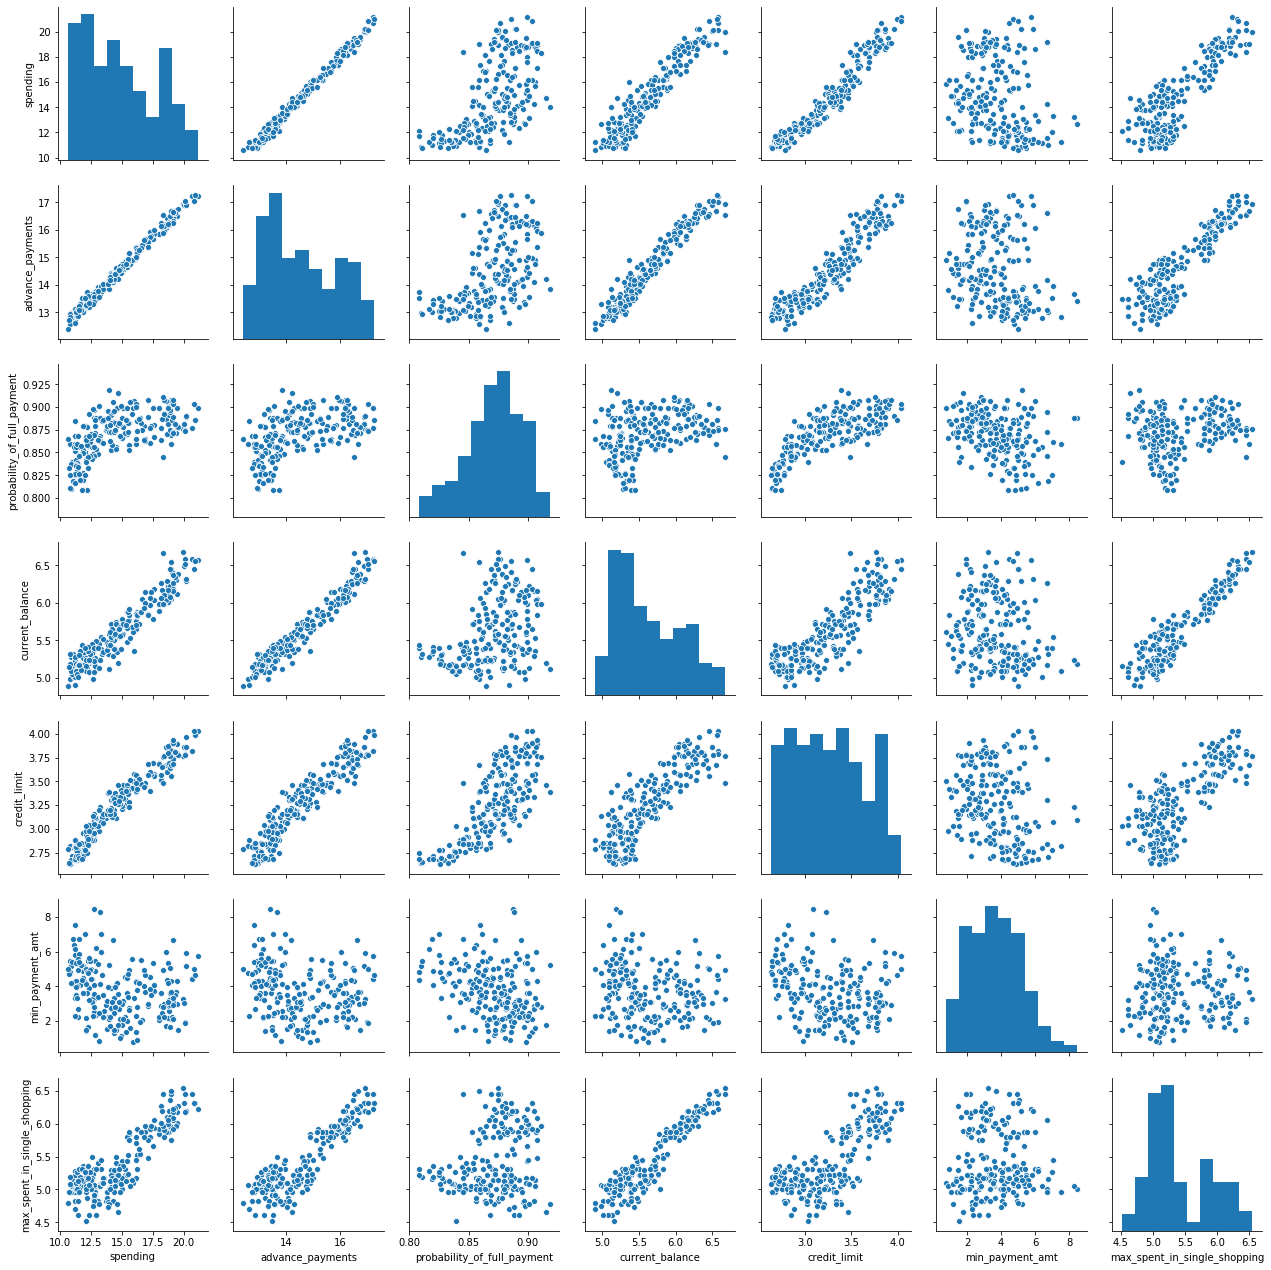

In [80]:
sns.pairplot(df_emp_numeric)

# Q2. Do you think scaling is necessary for clustering in this case? Justify.

In [81]:
df_emp.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [83]:
ward_link = linkage(df_emp,method = 'ward',metric='euclidean')
ward_link

array([[9.00000000e+00, 6.20000000e+01, 1.17378192e-01, 2.00000000e+00],
       [1.90000000e+01, 2.30000000e+01, 1.33858134e-01, 2.00000000e+00],
       [8.80000000e+01, 9.70000000e+01, 1.35824740e-01, 2.00000000e+00],
       [6.70000000e+01, 1.28000000e+02, 1.79010642e-01, 2.00000000e+00],
       [1.10000000e+02, 2.09000000e+02, 1.91444744e-01, 2.00000000e+00],
       [1.31000000e+02, 1.67000000e+02, 2.06017208e-01, 2.00000000e+00],
       [8.20000000e+01, 1.83000000e+02, 2.07593569e-01, 2.00000000e+00],
       [5.60000000e+01, 1.97000000e+02, 2.11674869e-01, 2.00000000e+00],
       [5.40000000e+01, 1.96000000e+02, 2.12034997e-01, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 2.17486206e-01, 2.00000000e+00],
       [9.50000000e+01, 1.26000000e+02, 2.20055925e-01, 2.00000000e+00],
       [3.20000000e+01, 7.10000000e+01, 2.24581834e-01, 2.00000000e+00],
       [1.01000000e+02, 1.98000000e+02, 2.24726589e-01, 2.00000000e+00],
       [4.00000000e+00, 2.20000000e+01, 2.24977799e

In [84]:
# scaling is required as our model gets bias toward the larger values that present in dataset.

# Q3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [85]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
ss = scale.fit(df_emp)
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
ss1 = ss.transform(df_emp)
ss1

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [87]:
data_scaled = pd.DataFrame(ss1,columns=df_emp.columns)
data_scaled

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


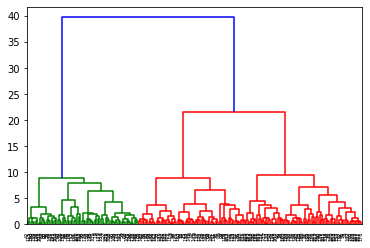

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(data_scaled,method = 'ward')
warddend = dendrogram(wardlink)

In [89]:
from scipy.cluster.hierarchy import fcluster

In [90]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [91]:
df_emp['clusters'] = clusters
df_emp.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [92]:
df_emp_clust = df_emp.groupby('clusters').mean()
df_emp_clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [93]:
cluster_freq = df_emp['clusters'].value_counts().sort_index()
cluster_freq

1    70
2    67
3    73
Name: clusters, dtype: int64

In [94]:
df_emp_clust['Frequency'] = cluster_freq.values
df_emp_clust

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# Q4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [95]:
df_emp.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [96]:
df_emp = df_emp.drop(['clusters'], axis=1)
df_emp.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [97]:
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [98]:
wss =[] 

In [99]:
for i in range(2,9): 
    KM = KMeans(n_clusters=i) 
    KM.fit(data_scaled) 
    wss.append(KM.inertia_)

In [100]:
for i in range(2,9):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 659.1717544870407
The WSS value for 3 clusters is 430.65897315130053
The WSS value for 4 clusters is 371.5811909715525
The WSS value for 5 clusters is 327.4353937624866
The WSS value for 6 clusters is 289.353423399496
The WSS value for 7 clusters is 261.40860632642944
The WSS value for 8 clusters is 243.0753681485305


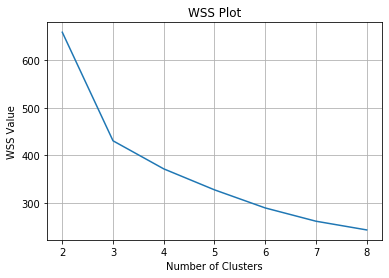

In [101]:
plt.plot(range(2,9), wss)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

In [102]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
labels = k_means.labels_
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [103]:
df_emp["Clus_kmeans"] = labels
df_emp.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [104]:
df_clust = df_emp.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
round(df_clust,2)

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0,11.86,13.25,0.85,5.23,2.85,4.74,5.10
1,1,18.50,16.20,0.88,6.18,3.70,3.63,6.04
2,2,14.44,14.34,0.88,5.51,3.26,2.71,5.12


In [105]:
cluster_freq = df_emp['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [106]:
df_clust['Frequency'] = cluster_freq.values
round(df_clust,2)

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
0,0,11.86,13.25,0.85,5.23,2.85,4.74,5.10,72
1,1,18.50,16.20,0.88,6.18,3.70,3.63,6.04,67
2,2,14.44,14.34,0.88,5.51,3.26,2.71,5.12,71


# silhouette score

In [107]:
silhouette_score(data_scaled,labels)

0.4007270552751299

In [108]:
sil_width = silhouette_samples(data_scaled,labels)

In [109]:
df_emp["width"] = sil_width
data_scaled.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [110]:
silhouette_samples(data_scaled,labels).min()

0.002713089347678533

# Q5.Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [111]:
df_clust['Frequency'] = cluster_freq.values
round(df_clust,2)

,Clus_kmeans,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
0,0,11.86,13.25,0.85,5.23,2.85,4.74,5.10,72
1,1,18.50,16.20,0.88,6.18,3.70,3.63,6.04,67
2,2,14.44,14.34,0.88,5.51,3.26,2.71,5.12,71


# For customers in cluster 1 shows that they prefer for less spending and their credit limit is also less. So the promotional strategies applied to this type of customers is increasing their credit card limit. 

# For customers in cluster 2 shows that they prefer for very high spending and their credit limit is also high. We don’t let go this type of customers. So the promotional strategies applied to this type of customers is increase their card limits giving them emi offers and other special promotional strategy should be applied on this type of customers.

# For customers in cluster 3 shows that they prefer for high spending and their credit limit is also not low and also no high. So the promotional strategies applied to this type of customers is giving cash back offers and also EMI offers.